# 02 Descriptive Analysis
### Author: Hugo Salas; Dataset: TOEFL11

asdsadsad
## 1. Import modules and data
#### 1a) Relevant modules and globals

In [1]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import squarify
import pickle

# Globals
PATH_DATA = '../data/text/'
PATH_RESP = f'{PATH_DATA}/responses/'
PATH_MODELS = f'{PATH_RESP}/models/'
RESP_JSON_OR = 'toefl11_resp_or.json'
TOEFL11_DF = "toefl11_DF.pkl"
PAL = "rocket"
COLORS = ['#B53158', '#E29072', "#59274E"]

#### 1b) Import data

In [2]:
toefl11_df = pd.read_pickle(PATH_RESP + TOEFL11_DF)
toefl11_df.head()

,Filename,Prompt,Language,Score Level,Essay length,Unique tokens,Mispelled words,ttr,rttr,cttr,...,rttr_quint_0_y,rttr_quint_1_y,rttr_quint_2_y,rttr_quint_3_y,rttr_quint_4_y,rttr_quint_0,rttr_quint_1,rttr_quint_2,rttr_quint_3,rttr_quint_4
0,88.txt,P6,KOR,high,416,163,0,0.391827,7.991733,5.651008,...,0,1,0,0,0,0,1,0,0,0
1,278.txt,P6,DEU,medium,339,129,3,0.380531,7.006318,4.954215,...,1,0,0,0,0,1,0,0,0,0
2,348.txt,P1,TUR,high,396,195,5,0.492424,9.799119,6.929023,...,0,0,0,0,1,0,0,0,0,1
3,666.txt,P2,ZHO,medium,402,166,2,0.412935,8.279327,5.854369,...,0,0,1,0,0,0,0,1,0,0
4,733.txt,P6,TEL,medium,362,149,8,0.411602,7.831266,5.537541,...,0,1,0,0,0,0,1,0,0,0


## 2. Descriptive graphs
#### 2a. Frequency plots

[Text(0.5, 1.0, 'Score distribution')]

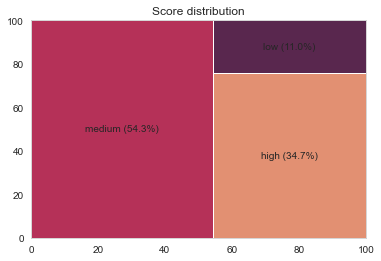

In [3]:
groupby_temp = toefl11_df[['Score Level']].value_counts()
sum = groupby_temp.sum()
labels = [f'{val[0]} ({str( round(groupby_temp[i]/sum*100, 1) )}%)' for i, val in enumerate(groupby_temp.index)]
sns.set_style(style="whitegrid")
squarify.plot(sizes=groupby_temp, label=labels, alpha=1, color = COLORS).set(title='Score distribution')

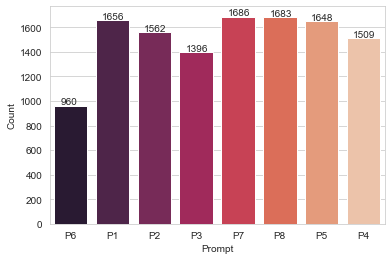

In [4]:
ax = sns.countplot(x="Prompt", data=toefl11_df, palette=PAL)
ax.set_ylabel('Count')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))

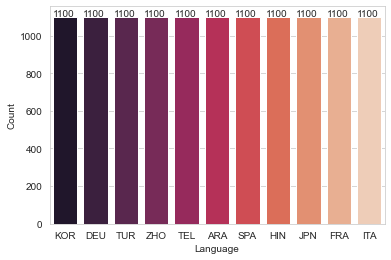

In [5]:
ax = sns.countplot(x="Language", data=toefl11_df, palette=PAL)
ax.set_ylabel('Count')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.3))

#### 2b. Violin plots

Text(0, 0.5, 'Essay length')

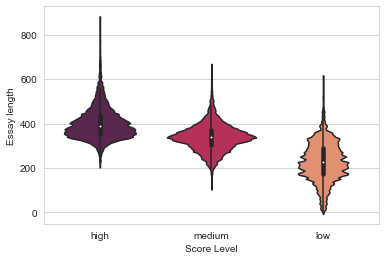

In [6]:
#Essay length
ax = sns.violinplot(x="Score Level", y="Essay length", data=toefl11_df, palette=PAL, bw=.05)
ax.set_ylabel('Essay length')

Text(0, 0.5, 'Unique tokens')

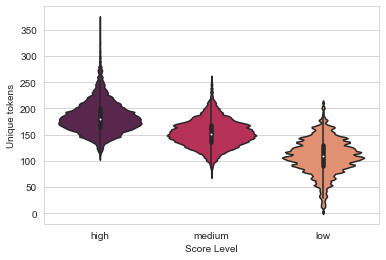

In [7]:
#Unique tokens
ax = sns.violinplot(x="Score Level", y="Unique tokens", data=toefl11_df, palette=PAL, bw=.05)
ax.set_ylabel('Unique tokens')

Text(0, 0.5, 'Lexical Diversity')

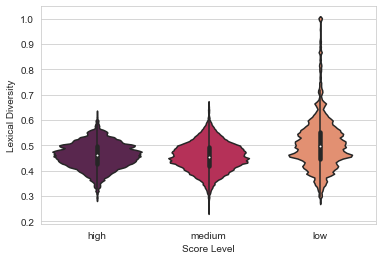

In [8]:
# Lexical diversity
ax = sns.violinplot(x="Score Level", y="ttr", data=toefl11_df, palette=PAL, bw=.05)
ax.set_ylabel('Lexical Diversity')

Text(0, 0.5, 'Mispelled words')

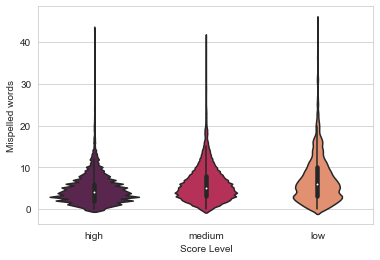

In [9]:
# Mispelled words
ax = sns.violinplot(x="Score Level", y="Mispelled words", data=toefl11_df, palette=PAL, bw=.10)
ax.set_ylabel('Mispelled words')

Text(0, 0.5, 'Mispelled words ratio')

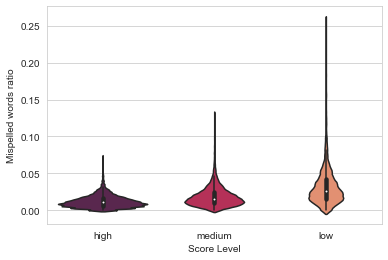

In [10]:
# Mispelled words ratio
toefl11_df['mispelled_ratio'] = toefl11_df['Mispelled words']/toefl11_df['Essay length']
ax = sns.violinplot(x="Score Level", y="mispelled_ratio", data=toefl11_df, palette=PAL, bw=.10)
ax.set_ylabel('Mispelled words ratio')

#### 2b. Bar plots

In [11]:
def groupby_col_selected(sel_col):
    
    cat_type = CategoricalDtype(categories=['score_high', 'score_medium', 'score_low'], ordered=True)
    groupby_temp = toefl11_df[['score_high', 'score_low', 'score_medium', sel_col]].groupby(by=sel_col).sum()
    colsum = groupby_temp.sum(axis = 1)
    for col in groupby_temp.columns:
        groupby_temp[col] = groupby_temp[col]/colsum*100
    groupby_temp = groupby_temp.reset_index()
    groupby_temp = groupby_temp.melt(sel_col)
    groupby_temp[sel_col] = groupby_temp[sel_col].astype("category")
    groupby_temp['variable'] = groupby_temp['variable'].astype(cat_type)

    return groupby_temp

In [12]:
groupby_temp = groupby_col_selected('Language')
groupby_temp.head()

,Language,variable,value
0,ARA,score_high,18.090909
1,DEU,score_high,61.181818
2,FRA,score_high,41.818182
3,HIN,score_high,58.363636
4,ITA,score_high,28.454545


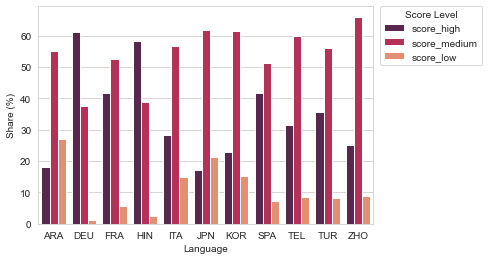

In [13]:
ax = sns.barplot(x="Language", y="value", hue="variable", data=groupby_temp, palette= PAL)
ax.set_ylabel('Share (%)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Score Level')


In [14]:
groupby_temp = groupby_col_selected('Prompt')
groupby_temp.head()

,Prompt,variable,value
0,P1,score_high,36.050725
1,P2,score_high,36.747759
2,P3,score_high,34.957020
3,P4,score_high,32.935719
4,P5,score_high,37.196602


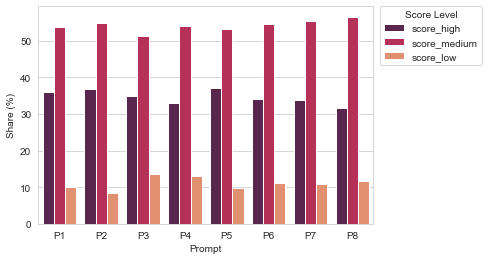

In [15]:
ax = sns.barplot(x="Prompt", y="value", hue="variable", data=groupby_temp, palette= PAL)
ax.set_ylabel('Share (%)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Score Level')